# Salt And Pepper Noise And NoiseReduction


        Parham Nayeri
        Apadana
        Ostad Zare

# Import Staff

Import libreris

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Import image by PIL.Image

Text(0.5, 1.0, 'Orginal Image')

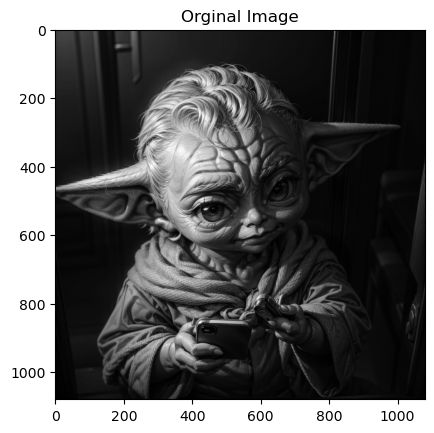

In [24]:
img = np.array(Image.open('00599-2940959091.png'))
img = np.mean(img, axis=2)
plt.imshow(img, cmap='gray')
plt.title('Orginal Image')


# Add Salt and Pepper Noise Function

function Salt baraye ezaf kardan noise 0 ya 255 be sorate random ast

In [25]:
def salt(img,selected):
    for i in range(len(selected)):
        ranDom = np.random.rand()
        if (ranDom <0.5):
            img[selected[i][0]][selected[i][1]] = 255
        else :
            img[selected[i][0]][selected[i][1]] = 0
    return img

function selectRandom baraye entekhab darsade morede nazar az pixel ha besorate random ast

In [26]:
def selectRandom(img,percent):
    percent = percent/100
    x,y = img.shape
    allindex = [(i,j)for i in range(x) for j in range(y)]
    count = int(len(allindex)*percent)
    randomindex = np.random.choice(len(allindex),count,replace=False)
    selected = [allindex[l] for l in randomindex]
    salted = salt(img,selected)
    return salted

# SHOW RESULT :

Text(0.5, 1.0, ' 10% Salt-And-Pepper Image')

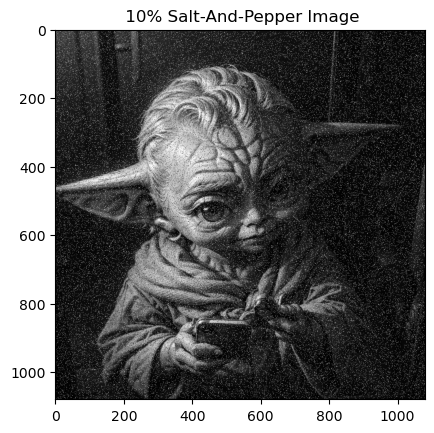

In [27]:
percentage = 10
noised10 = selectRandom(img,percentage)
plt.imshow(noised10 , cmap='gray')
plt.title(f' {percentage}% Salt-And-Pepper Image')

Text(0.5, 1.0, ' 25% Salt-And-Pepper Image')

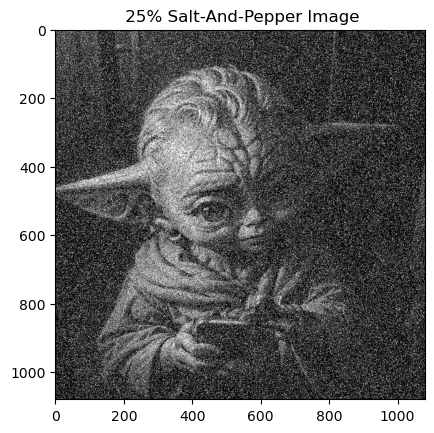

In [28]:
percentage = 25
noised25 = selectRandom(img,percentage)
plt.imshow(noised25 , cmap='gray')
plt.title(f' {percentage}% Salt-And-Pepper Image')

Text(0.5, 1.0, ' 50% Salt-And-Pepper Image')

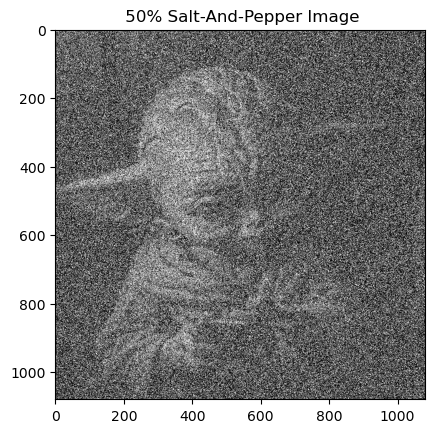

In [29]:
percentage = 50
noised50 = selectRandom(img,percentage)
plt.imshow(noised50 , cmap='gray')
plt.title(f' {percentage}% Salt-And-Pepper Image')

# Noise Reduction

Median Blur filter yeki az ravesh haye sade baraye noise reduction ast be in sorat ke yek kernel khali baroye 2D array tasvir harkat karde ba miyan matrix ra dar pixel jadid zakhire mikonad va inkar ba ese kahesh noise mishavad 

* harchi Kenral size ma bozorg tar bashad Noise Reduction bishtari sorat migirad Ama Tasvir be samte Blur shodan va az dast dadan vozoh miravad

In [30]:
def medianBlur(img):
    kernel = 9
    padSize = kernel // 2
    padding = np.pad(img, padSize, mode='constant', constant_values=0)
    outImg = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            selectMed = padding[i:i+kernel, j:j+kernel]
            outImg[i, j] = np.median(selectMed)
    
    return outImg

Show Result :

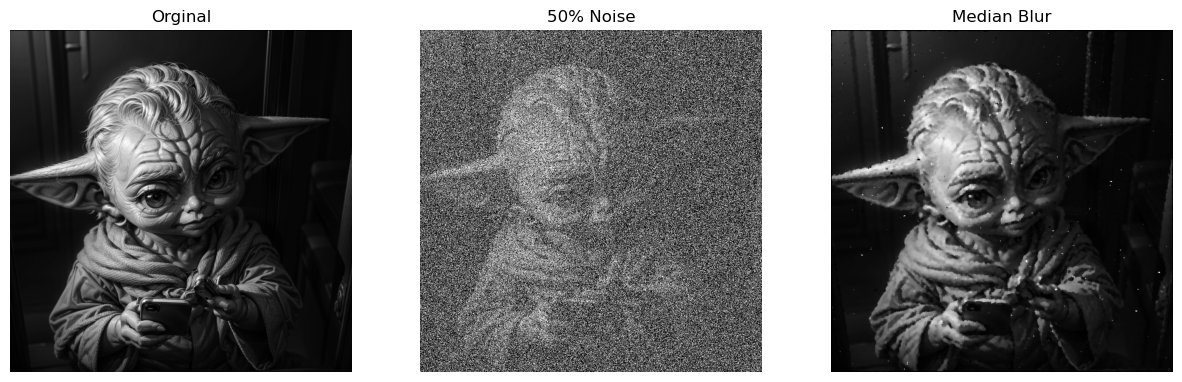

In [32]:
deNoise = medianBlur(noised50)
img2 = np.array(Image.open('00599-2940959091.png'))
img2 = np.mean(img2, axis=2)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img2,cmap='gray')
axes[0].set_title('Orginal')
axes[0].axis('off')  

axes[1].imshow(noised50,cmap='gray')
axes[1].set_title('50% Noise')
axes[1].axis('off')  

axes[2].imshow(deNoise,cmap='gray')
axes[2].set_title('Median Blur')
axes[2].axis('off') 

plt.show()